# Ejercicio de clasificación de especies flor Iris utilizando librerías de Python para aprendizaje automático

Te proponemos ver en acción las librerías que has estudiado con el famoso dataset ["iris flower data set" elaborado por el biólogo Ronald Fisher](https://en.wikipedia.org/wiki/Iris_flower_data_set).
En él, hay valores de medidas de los sépalos y pétalos de ejemplares de esta flor, según su especie.

![Especies Iris](https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg)


## Apartado 1:

1. Importa las librerías Numpy y Pandas

In [29]:
import numpy as np
import pandas as pd

2. Importa load_iris de la biblioteca de datasets de scikit-learn y echa un vistazo rápido a sus principales elementos 'data', 'target' y 'target_names'.

In [64]:
from sklearn.datasets import load_iris

data = load_iris()

In [ ]:
data['data']

In [ ]:
data['target']

In [11]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

3. Utiliza la clase DataFrame para crear el dataset df y añade la columna "Species" a partir de la secuencia target. Utiliza la función head para ver los primeros registros del nuevo dataset.

In [65]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Species'] = data.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

4. Utiliza la función describe para ver los principales valores estadísticos del dataset.

In [13]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     Species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

## Apartado 2:

1. Importa el paquete pyplot de la librería matplotlib y haz una representación del dataset tipo "dispersión de puntos" o scatter plot con la variable "sepal length (cm)" en el eje x y la variable "sepal width (cm)" en el eje y.

In [14]:
import matplotlib.pyplot as plt

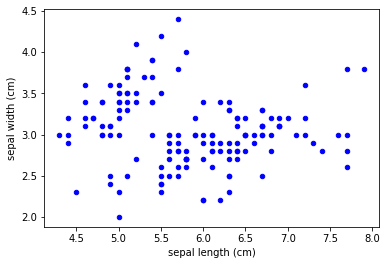

In [15]:
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue')

2. Ahora haz una representación gráfica de los casos, pero distinguiendo con el color azul la especie "Setosa", con color verde la variable "Versicolor" y con color rojo la variable "Virginica".

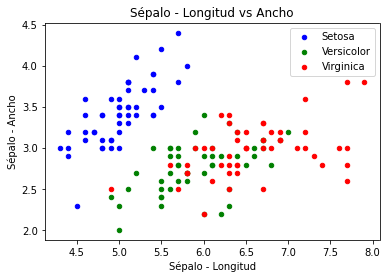

In [16]:
fig = df[df.Species == 0].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue', label='Setosa')
df[df.Species == 1].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='green', label='Versicolor', ax=fig)
df[df.Species == 2].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

3. Analiza cómo se distribuyen los casos si, en vez de representar según las variables de los sépalos, utilizamos las variables basadas en las dimensiones de los pétalos. Representa los datos en una gráfica scatter, utilizando en el eje x la variable "petal length (cm)" y en el eje y la variable "petal width". De nuevo, distingue las especies con tres colores: color azul la especie "Setosa", con color verde la variable "Versicolor" y con color rojo la variable "Virginica".

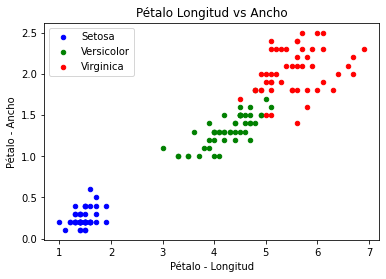

In [17]:
fig = df[df.Species == 0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='blue', label='Setosa')
df[df.Species == 1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='green', label='Versicolor', ax=fig)
df[df.Species == 2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

## Apartado 3:

1. Importa los módulos de la librería Scikit-learn que nos permiten hacer un modelo de regresión lineal, un modelo de máquina de vectores soporte, un modelo de tipo los K vecinos más cercanos (KNN), y un modelo de tipo árbol de decición.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

2. Genera el conjunto de datos X con las variables de entrada a los modelos, y el conjunto y de las etiquetas o variable de salida del modelo, eligiendo para éste último, la variable "Specie

In [67]:
y = df['Species']
X = df.drop('Species',axis=1)

3. Utiliza la función train_test_split para separar los datos en el conjunto train y test según el ejemplo.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

4. Crea un modelo de Regresión Logística. Utiliza la función fit para entrenarlo y utiliza la función predict sobre los datos de test para medir la precisión del modelo. Muestra el valor de dicha precisión con print.

In [69]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Regresión Logística: 0.9


5. Crea un modelo de SVC o Máquinas de Vectores de Soporte, entrénalo y calcula la precisión utilizando los datos de test. Muestra la precisión.

In [70]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Máquinas de Vectores de Soporte: 0.9


6. Crea un modelo de KNN o K vecinos más cercanos, entrénalo y calcula la precisión utilizando los datos de test. Muestra la precisión.

In [71]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Vecinos más Cercanos: 0.9666666666666667


7. Crea un modelo de árbol de decisión, entrénalo y calcula la precisión utilizando los datos de test. Muestra la precisión.

In [72]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Árboles de Decisión Clasificación: 0.9


8. Compara los valores de precisión que has ido consiguiendo en los diferentes modelos. ¿Cuál sería el mejor para este dataset?

# Apartado 2

1. Imagina que no has podido tener todas las variables, y que solo has conseguido los valores de las medidas de los sépalos, y con esos datos debes entrenar un modelo que acierte con el tipo de especie de flor de iris. Para ello, crea un nuevo dataset que tenga solo las columnas de las dimensiones de los sépalos y la de la especie.

In [73]:
sepalo = df[['sepal length (cm)','sepal width (cm)','Species']]
sepalo.head()

sepal length (cm)  sepal width (cm)  Species
0                5.1               3.5        0
1                4.9               3.0        0
2                4.7               3.2        0
3                4.6               3.1        0
4                5.0               3.6        0

2. Separa los datos en X_sepalo para las variables de entrada e y_sepalo para la variable de salida

In [74]:
y_sepalo = sepalo['Species']
X_sepalo = sepalo.drop('Species',axis=1)

3. Separa los datos en un conjunto X_train_s, X_test_s,y_train_s, y_test_s, para entrenamiento y test del modelo.

In [75]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)

4. Crea, entrena y mide la precisión de un modelo de Regresión Logística. Muestra la precisión. ¿Es muy diferente al mismo modelo del apartado anterior?

In [76]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_s, y_train_s)
print('Precisión Regresión Logística - Sépalo: {}'.format(algoritmo.score(X_test_s, y_test_s)))

Precisión Regresión Logística - Sépalo: 0.8666666666666667


5. Crea, entrena y mide la precisión de un modelo de Máquinas de Vectores Soporte. Muestra la precisión ¿Es muy diferente al mismo tipo de modelo del apartado anterior?

In [77]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_s, y_train_s)
print('Precisión Máquinas de Vectores de Soporte - Sépalo: {}'.format(algoritmo.score(X_test_s, y_test_s)))

Precisión Máquinas de Vectores de Soporte - Sépalo: 0.8666666666666667


6. Crea, entrena y mide la precisión de un modelo de K vecinos más cercanos. Muestra la precisión ¿Es muy diferente al mismo tipo de modelo del apartado anterior?

In [78]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_s, y_train_s)
print('Precisión Vecinos más Cercanos - Sépalo: {}'.format(algoritmo.score(X_test_s, y_test_s)))

Precisión Vecinos más Cercanos - Sépalo: 0.8


7. Crea, entrena y mide la precisión de un modelo de Árbol de decisión. Muestra la precisión ¿Es muy diferente al mismo tipo de modelo del apartado anterior?

In [79]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_test_s, y_test_s)))

Precisión Árboles de Decisión Clasificación - Sépalo: 0.7666666666666667


8. Compara los valores de precisión que has ido consiguiendo en los diferentes modelos. ¿Cuál sería el mejor para este dataset?